In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
import pandas.util.testing as tm
from sklearn.metrics import silhouette_samples, silhouette_score

In [0]:
%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

In [76]:
data = pd.read_csv('http://iali.in/datasets/IEEEAPSIT/unsupervised-ml/Wholesale%20customers%20data.csv')
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


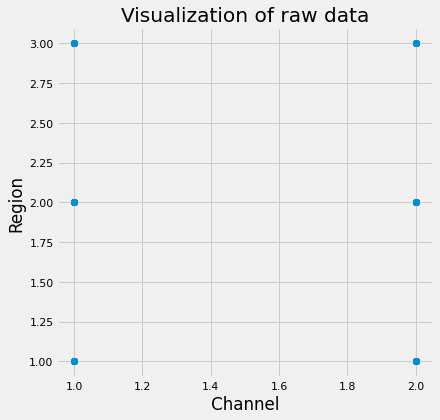

In [77]:
plt.figure(figsize=(6, 6))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1])
plt.xlabel('Channel')
plt.ylabel('Region')
plt.title('Visualization of raw data');

In [0]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(data)

In [79]:
scaled_df

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [80]:
model = KMeans(n_clusters=2,
               init='k-means++',
               n_init=10,
               max_iter=300,
               tol=0.0001,
               precompute_distances='auto',
               verbose=0,
               random_state=42,
               copy_x=True,
               n_jobs=-1,
               algorithm='auto')

model.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [81]:
pred = model.predict(scaled_df)
data['cluster'] = pred
print('\nCount in each cluster: \n', data['cluster'].value_counts())


Count in each cluster: 
 0    304
1    136
Name: cluster, dtype: int64


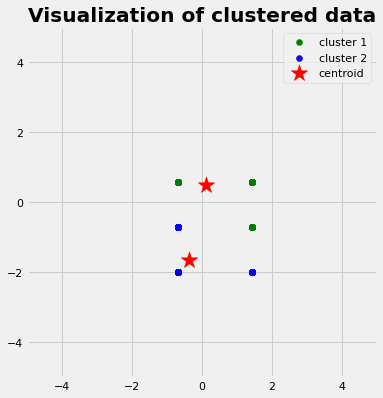

In [84]:
centroids = model.centroids

fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(scaled_df[model.labels == 0, 0], scaled_df[model.labels == 0, 1],
            c='green', label='cluster 1')
plt.scatter(scaled_df[model.labels == 1, 0], scaled_df[model.labels == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

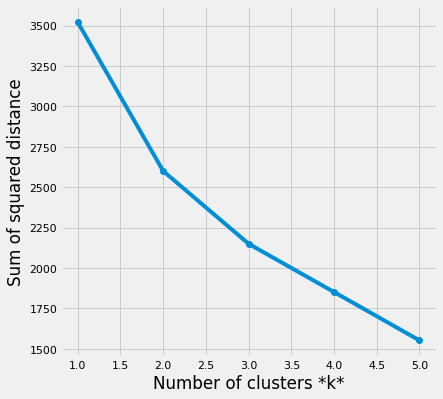

In [56]:
sse = []
list_k = list(range(1, 6))
for k in list_k:
    model = KMeans(n_clusters=k)
    model.fit(scaled_df)
    sse.append(model.inertia_)

plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')

plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');